In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torch.nn import functional
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform= ToTensor()
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [3]:
len(training_data)

60000

Label : 5


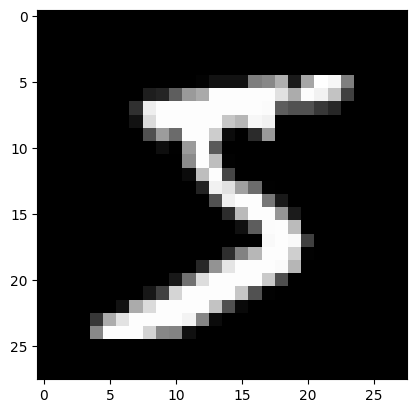

In [51]:
img, label = training_data[0]
plt.imshow(img[0], cmap = 'gray')
print(f"Label : {label}")

Label : 0


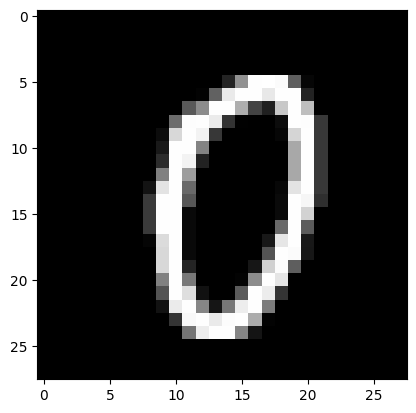

In [52]:
img, label = training_data[1000]
plt.imshow(img[0], cmap = 'gray')
print(f"Label : {label}")

Label : 0


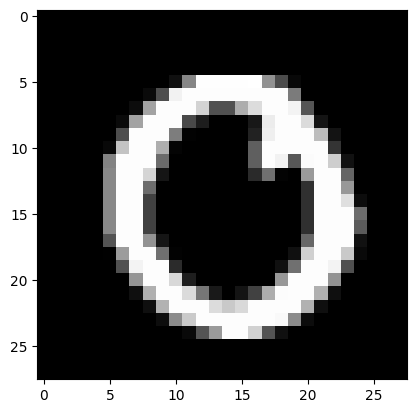

In [53]:
img, label = training_data[4532]
plt.imshow(img[0], cmap = 'gray')
print(f"Label : {label}")

In [4]:
train_ds, val_ds = random_split(training_data, [50000, 10000])

In [5]:
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle = True)
val_dataloader = DataLoader(val_ds, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

In [6]:
model = nn.Linear(784, 10)

In [7]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784, 10)

    def forward(self, feature_batch):
        feature_batch = self.flatten(feature_batch)
        pred = self.linear(feature_batch)
        return pred

model = SimpleModel()

In [8]:
for batch in train_dataloader:
    feature, target = batch
    pred = model(feature)
    print(pred.shape)
    break

torch.Size([64, 10])


In [9]:
print(pred[20])

tensor([ 0.0128, -0.0931,  0.1178, -0.2290,  0.2965, -0.0535, -0.1868,  0.3456,
         0.1336, -0.0669], grad_fn=<SelectBackward0>)


In [10]:
probs = functional.softmax(pred, dim = 1)

In [11]:
print(probs[10])

tensor([0.0965, 0.0757, 0.1001, 0.0960, 0.1112, 0.0864, 0.0721, 0.1435, 0.1360,
        0.0824], grad_fn=<SelectBackward0>)


In [12]:
print(f"Sum = {torch.sum(probs[10]).item()}")

Sum = 1.0


In [13]:
max_prob, predicted_digit = torch.max(probs, dim = 1)
print(f"Maximum probabilities are : \n{max_prob}")
print(f"Predicted digits are : \n{predicted_digit}")

Maximum probabilities are : 
tensor([0.1227, 0.1653, 0.1108, 0.1271, 0.1184, 0.1177, 0.1215, 0.1215, 0.1583,
        0.1500, 0.1435, 0.1302, 0.1184, 0.1418, 0.1351, 0.1493, 0.1266, 0.1201,
        0.1177, 0.1531, 0.1351, 0.1429, 0.1258, 0.1236, 0.1169, 0.1436, 0.1339,
        0.1291, 0.1207, 0.1236, 0.1337, 0.1374, 0.1214, 0.1209, 0.1241, 0.1163,
        0.1230, 0.1358, 0.1324, 0.1397, 0.1628, 0.1518, 0.1312, 0.1194, 0.1217,
        0.1256, 0.1295, 0.1219, 0.1315, 0.1264, 0.1214, 0.1509, 0.1445, 0.1161,
        0.1361, 0.1300, 0.1260, 0.1276, 0.1523, 0.1494, 0.1587, 0.1482, 0.1129,
        0.1314], grad_fn=<MaxBackward0>)
Predicted digits are : 
tensor([2, 8, 5, 2, 3, 0, 8, 8, 4, 4, 7, 7, 2, 7, 4, 8, 1, 4, 0, 8, 7, 3, 2, 4,
        0, 9, 8, 8, 4, 9, 4, 8, 8, 4, 0, 8, 4, 7, 8, 5, 4, 4, 4, 4, 7, 4, 4, 5,
        4, 7, 2, 7, 4, 2, 8, 9, 4, 4, 0, 8, 8, 4, 7, 4])


In [14]:
target

tensor([7, 0, 5, 7, 8, 7, 2, 1, 8, 8, 6, 2, 1, 6, 2, 5, 4, 1, 9, 5, 1, 3, 2, 9,
        7, 2, 5, 0, 1, 5, 4, 0, 2, 1, 7, 8, 3, 8, 1, 8, 2, 9, 7, 8, 4, 1, 6, 4,
        4, 6, 8, 6, 4, 1, 6, 2, 0, 4, 0, 6, 8, 1, 1, 9])

In [15]:
predicted_digit

tensor([2, 8, 5, 2, 3, 0, 8, 8, 4, 4, 7, 7, 2, 7, 4, 8, 1, 4, 0, 8, 7, 3, 2, 4,
        0, 9, 8, 8, 4, 9, 4, 8, 8, 4, 0, 8, 4, 7, 8, 5, 4, 4, 4, 4, 7, 4, 4, 5,
        4, 7, 2, 7, 4, 2, 8, 9, 4, 4, 0, 8, 8, 4, 7, 4])

In [16]:
target

tensor([7, 0, 5, 7, 8, 7, 2, 1, 8, 8, 6, 2, 1, 6, 2, 5, 4, 1, 9, 5, 1, 3, 2, 9,
        7, 2, 5, 0, 1, 5, 4, 0, 2, 1, 7, 8, 3, 8, 1, 8, 2, 9, 7, 8, 4, 1, 6, 4,
        4, 6, 8, 6, 4, 1, 6, 2, 0, 4, 0, 6, 8, 1, 1, 9])

In [17]:
target == predicted_digit

tensor([False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True,  True, False, False, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False,  True, False, False, False, False,  True,  True, False,
         True, False, False, False])

In [18]:
torch.sum(target == predicted_digit).item()/ len(target)

0.15625

In [19]:
def accuracy(output, label):
    max_prob, pred_digit = torch.max(output, dim = 1)
    return torch.sum(pred_digit == label).item() / len(label)

In [20]:
acc = accuracy(pred, target)
acc

0.15625

In [21]:
loss_fn = functional.cross_entropy

In [22]:
loss = loss_fn(pred, target)

In [23]:
print(loss)

tensor(2.3126, grad_fn=<NllLossBackward0>)


In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784, 10)
    def forward(self, train_batch):
        train_batch = self.flatten(train_batch)
        predicted_label = self.linear(train_batch)
        return predicted_label
    def training_step(self, batch):
        feature, label = batch
        predicted_label = self(feature)
        loss = functional.cross_entropy(predicted_label, label)
        return loss
    def validation_step(self, batch):
        feature, label = batch
        predicted_label = self(feature)
        loss = functional.cross_entropy(predicted_label, label)
        val_accuracy = accuracy(predicted_label, label)
        return {
            'val_loss' : loss,
            'val_accuracy' : torch.tensor(val_accuracy)
        }

    def validation_epoch_end(self, val_output):
        batch_losses = [x['val_loss'] for x in val_output]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acc = [x['val_accuracy'] for x in val_output]
        epoch_acc = torch.stack(batch_acc).mean()
        return {
            'val_loss' : epoch_loss.item(),
            'val_acc' : epoch_acc.item()
        }

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], val_loss: {result['val_loss']:0.4f}, val_acc: {result['val_acc']:0.4f}")

model = MnistModel()

In [25]:
def evaluate(model, val_dataloader):
    outputs = [model.validation_step(batch) for batch in val_dataloader]
    return model.validation_epoch_end(outputs)

In [26]:
outputs = []
for batch in val_dataloader:
    feature, label = batch
    predicted_label = model(feature)
    loss = functional.cross_entropy(predicted_label, label)
    val_accuracy = torch.tensor(accuracy(predicted_label, label))
    dict = {
        'val_loss' : loss,
        'val_accuracy' : val_accuracy
    }
    outputs.append(dict)
batch_losses = [x['val_loss'] for x in outputs]
epoch_loss = torch.stack(batch_losses).mean()
batch_acc = [x['val_accuracy'] for x in outputs]
epoch_acc = torch.stack(batch_acc).mean()
print(f"Val_loss = {epoch_loss.item()}")
print(f"val_accuracy = {epoch_acc.item()}")

Val_loss = 2.2835850715637207
val_accuracy = 0.16222134232521057


# Training the model

In [27]:
def fit(epochs, lr, train_dataloader, val_dataloader, model, opt_fn = torch.optim.SGD,):
    opt = opt_fn(model.parameters(), lr)
    history = []
    for epoch in range(epochs):
        # training
        for batch in train_dataloader:
            loss = model.training_step(batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
        # validation
        result = evaluate(model, val_dataloader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [28]:
result0 = evaluate(model, val_dataloader)
print(result0)

{'val_loss': 2.283562183380127, 'val_acc': 0.16281847655773163}


In [29]:
history = fit(50, 0.001, train_dataloader, val_dataloader, model)

Epoch [0], val_loss: 1.6609, val_acc: 0.7198
Epoch [1], val_loss: 1.3183, val_acc: 0.7734
Epoch [2], val_loss: 1.1147, val_acc: 0.7977
Epoch [3], val_loss: 0.9849, val_acc: 0.8117
Epoch [4], val_loss: 0.8946, val_acc: 0.8215
Epoch [5], val_loss: 0.8270, val_acc: 0.8300
Epoch [6], val_loss: 0.7761, val_acc: 0.8361
Epoch [7], val_loss: 0.7355, val_acc: 0.8422
Epoch [8], val_loss: 0.7015, val_acc: 0.8454
Epoch [9], val_loss: 0.6746, val_acc: 0.8496
Epoch [10], val_loss: 0.6514, val_acc: 0.8522
Epoch [11], val_loss: 0.6315, val_acc: 0.8543
Epoch [12], val_loss: 0.6131, val_acc: 0.8562
Epoch [13], val_loss: 0.5974, val_acc: 0.8587
Epoch [14], val_loss: 0.5842, val_acc: 0.8608
Epoch [15], val_loss: 0.5712, val_acc: 0.8635
Epoch [16], val_loss: 0.5624, val_acc: 0.8648
Epoch [17], val_loss: 0.5510, val_acc: 0.8664
Epoch [18], val_loss: 0.5414, val_acc: 0.8684
Epoch [19], val_loss: 0.5334, val_acc: 0.8702
Epoch [20], val_loss: 0.5247, val_acc: 0.8707
Epoch [21], val_loss: 0.5181, val_acc: 0.871

Text(0.5, 1.0, 'Accuracy vs No of Epochs')

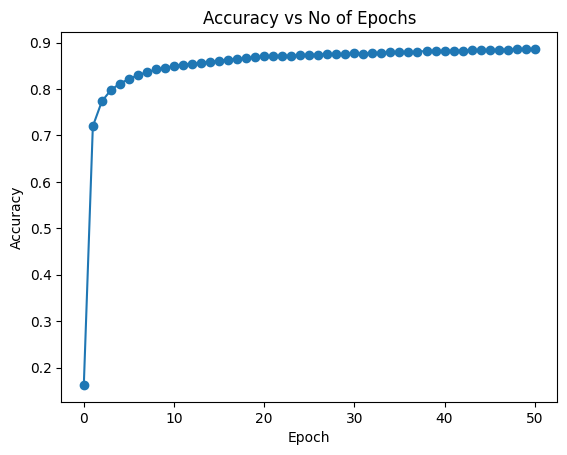

In [30]:
history = [result0] + history
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No of Epochs')

Label = 7
Image shape = torch.Size([1, 28, 28])


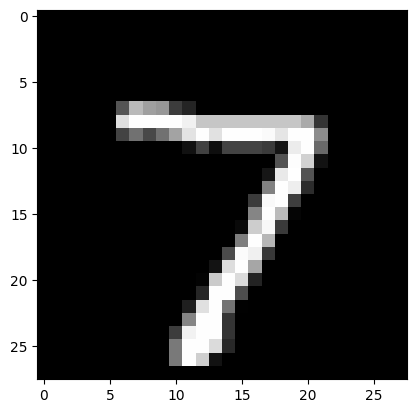

In [31]:
img, label = test_data[0]
plt.imshow(img[0], cmap = 'gray')
print(f"Label = {label}")
print(f"Image shape = {img.shape}")

In [32]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    max_prob, pred = torch.max(yb, dim = 1)
    return pred[0].item()

In [33]:
xb = img.unsqueeze(0)
yb = model(xb)
_, pred = torch.max(yb, dim = 1)
print(pred)

tensor([7])


In [34]:
print(pred.item())

7


In [35]:
print(pred[0])

tensor(7)


Actual label : 6 
Predicted label: 6


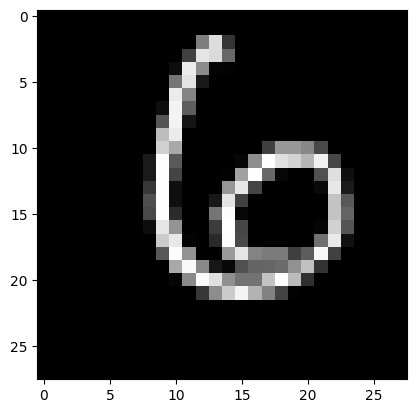

In [36]:
img, label = test_data[100]
plt.imshow(img[0], cmap = 'gray')
print(f"Actual label : {label} \nPredicted label: {predict_image(img, model)}")

Actual label : 0 
Predicted label: 0


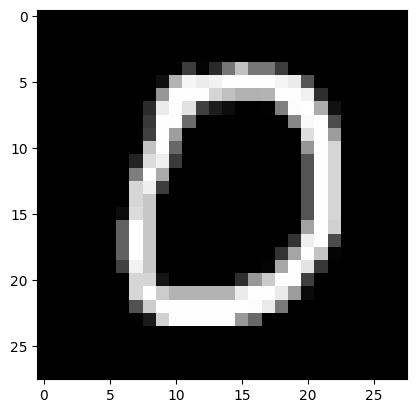

In [37]:
img, label = test_data[10]
plt.imshow(img[0], cmap = 'gray')
print(f"Actual label : {label} \nPredicted label: {predict_image(img, model)}")

Actual label : 9 
Predicted label: 4


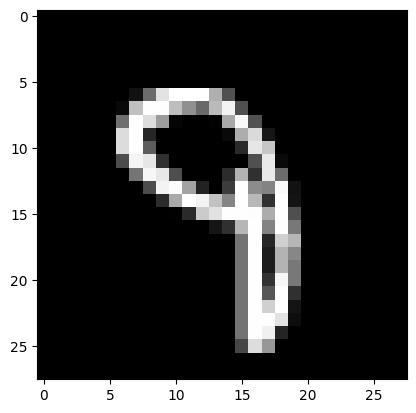

In [38]:
img, label = test_data[193]
plt.imshow(img[0], cmap = 'gray')
print(f"Actual label : {label} \nPredicted label: {predict_image(img, model)}")

Actual label : 2 
Predicted label: 8


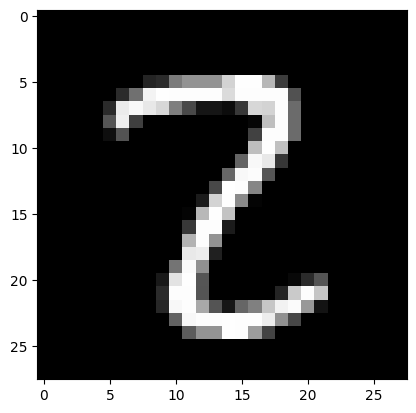

In [39]:
img, label = test_data[1839]
plt.imshow(img[0], cmap = 'gray')
print(f"Actual label : {label} \nPredicted label: {predict_image(img, model)}")

Actual label : 3 
Predicted label: 3


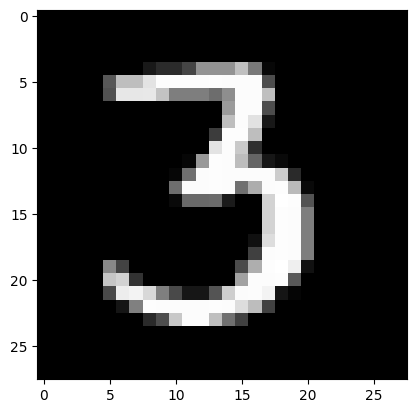

In [40]:
img, label = test_data[2555]
plt.imshow(img[0], cmap = 'gray')
print(f"Actual label : {label} \nPredicted label: {predict_image(img, model)}")

In [41]:
result = evaluate(model, test_dataloader)

In [42]:
result

{'val_loss': 0.3947143852710724, 'val_acc': 0.8970939517021179}

In [43]:
test_loader = DataLoader(test_data, batch_size = 256)
result32 = evaluate(model, test_loader)
print(result32)

{'val_loss': 0.3915962874889374, 'val_acc': 0.896679699420929}


In [44]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[-1.0518e-02,  6.4782e-03, -3.6535e-03,  ...,  1.4508e-02,
         -8.4260e-04, -2.9982e-02],
        [ 1.7835e-02,  1.2726e-02, -2.9365e-02,  ...,  4.9708e-03,
         -1.1646e-02,  9.6651e-03],
        [ 6.5229e-03, -1.0418e-02, -2.7959e-02,  ...,  5.6101e-05,
          3.7650e-03,  3.1824e-02],
        ...,
        [ 1.0070e-02,  1.1674e-02,  3.7126e-03,  ...,  2.4332e-02,
          1.6196e-02,  2.6503e-03],
        [-1.4129e-02, -1.1981e-02,  5.4324e-03,  ...,  2.2767e-02,
         -4.8455e-03, -1.7897e-02],
        [-2.9853e-02,  2.8433e-02, -2.4485e-02,  ..., -2.8241e-02,
         -1.2673e-02,  1.5779e-02]])), ('linear.bias', tensor([-0.0705,  0.1487, -0.0095, -0.0938,  0.0276,  0.1916, -0.0158,  0.1105,
        -0.2712, -0.0455]))])


In [45]:
torch.save(model.state_dict(), 'mnist_logistic.pth')

In [46]:
model1 = MnistModel()
model1.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0136, -0.0319, -0.0223,  ..., -0.0091, -0.0235,  0.0083],
                      [ 0.0006,  0.0175,  0.0239,  ...,  0.0046, -0.0010,  0.0150],
                      [-0.0171,  0.0208, -0.0194,  ..., -0.0161,  0.0160, -0.0271],
                      ...,
                      [ 0.0206, -0.0034, -0.0007,  ..., -0.0164,  0.0223, -0.0293],
                      [-0.0078,  0.0071, -0.0308,  ..., -0.0254, -0.0071,  0.0143],
                      [-0.0179,  0.0153, -0.0008,  ...,  0.0157, -0.0288,  0.0225]])),
             ('linear.bias',
              tensor([ 0.0029, -0.0033,  0.0151,  0.0006, -0.0190, -0.0013,  0.0271, -0.0142,
                      -0.0038, -0.0329]))])

In [47]:
evaluate(model1, test_dataloader)

{'val_loss': 2.3446736335754395, 'val_acc': 0.04538216441869736}

In [48]:
model1.load_state_dict(torch.load('mnist_logistic.pth'))
print(model1.state_dict())
print(evaluate(model1, test_dataloader))

OrderedDict([('linear.weight', tensor([[-1.0518e-02,  6.4782e-03, -3.6535e-03,  ...,  1.4508e-02,
         -8.4260e-04, -2.9982e-02],
        [ 1.7835e-02,  1.2726e-02, -2.9365e-02,  ...,  4.9708e-03,
         -1.1646e-02,  9.6651e-03],
        [ 6.5229e-03, -1.0418e-02, -2.7959e-02,  ...,  5.6101e-05,
          3.7650e-03,  3.1824e-02],
        ...,
        [ 1.0070e-02,  1.1674e-02,  3.7126e-03,  ...,  2.4332e-02,
          1.6196e-02,  2.6503e-03],
        [-1.4129e-02, -1.1981e-02,  5.4324e-03,  ...,  2.2767e-02,
         -4.8455e-03, -1.7897e-02],
        [-2.9853e-02,  2.8433e-02, -2.4485e-02,  ..., -2.8241e-02,
         -1.2673e-02,  1.5779e-02]])), ('linear.bias', tensor([-0.0705,  0.1487, -0.0095, -0.0938,  0.0276,  0.1916, -0.0158,  0.1105,
        -0.2712, -0.0455]))])
{'val_loss': 0.39485082030296326, 'val_acc': 0.8970939517021179}


In [49]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-1.0518e-02,  6.4782e-03, -3.6535e-03,  ...,  1.4508e-02,
                       -8.4260e-04, -2.9982e-02],
                      [ 1.7835e-02,  1.2726e-02, -2.9365e-02,  ...,  4.9708e-03,
                       -1.1646e-02,  9.6651e-03],
                      [ 6.5229e-03, -1.0418e-02, -2.7959e-02,  ...,  5.6101e-05,
                        3.7650e-03,  3.1824e-02],
                      ...,
                      [ 1.0070e-02,  1.1674e-02,  3.7126e-03,  ...,  2.4332e-02,
                        1.6196e-02,  2.6503e-03],
                      [-1.4129e-02, -1.1981e-02,  5.4324e-03,  ...,  2.2767e-02,
                       -4.8455e-03, -1.7897e-02],
                      [-2.9853e-02,  2.8433e-02, -2.4485e-02,  ..., -2.8241e-02,
                       -1.2673e-02,  1.5779e-02]])),
             ('linear.bias',
              tensor([-0.0705,  0.1487, -0.0095, -0.0938,  0.0276,  0.1916, -0.0158,  0.1105,
                      -0.2712,

In [50]:
list(model.parameters())

[Parameter containing:
 tensor([[-1.0518e-02,  6.4782e-03, -3.6535e-03,  ...,  1.4508e-02,
          -8.4260e-04, -2.9982e-02],
         [ 1.7835e-02,  1.2726e-02, -2.9365e-02,  ...,  4.9708e-03,
          -1.1646e-02,  9.6651e-03],
         [ 6.5229e-03, -1.0418e-02, -2.7959e-02,  ...,  5.6101e-05,
           3.7650e-03,  3.1824e-02],
         ...,
         [ 1.0070e-02,  1.1674e-02,  3.7126e-03,  ...,  2.4332e-02,
           1.6196e-02,  2.6503e-03],
         [-1.4129e-02, -1.1981e-02,  5.4324e-03,  ...,  2.2767e-02,
          -4.8455e-03, -1.7897e-02],
         [-2.9853e-02,  2.8433e-02, -2.4485e-02,  ..., -2.8241e-02,
          -1.2673e-02,  1.5779e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0705,  0.1487, -0.0095, -0.0938,  0.0276,  0.1916, -0.0158,  0.1105,
         -0.2712, -0.0455], requires_grad=True)]